
# Project Overview: Predict housing prices using different regression models

### Objective: 
The project aims to analyze and compare various regression algorithms on a dataset of housing-related attributes and prices to identify the most accurate model for predicting housing prices. Through feature importance analysis and visualization, the project aims to provide insights into factors influencing housing prices and offer a reliable model for real-world price prediction applications.

#### 1. Data Loading and Exploration:
The project starts by loading a dataset from a given URL using Pandas, a popular data manipulation library in Python. The dataset contains information about housing features such as average area income, number of rooms, bedrooms, etc., along with the corresponding price. Basic exploration is conducted to understand the structure and content of the dataset.

#### 2. Data Preparation:
The dataset is split into two parts: features (input variables) and target (output variable). The data is then divided into training and testing sets to train the models and evaluate their performance. A common practice in machine learning is to use a portion of the data for training and the rest for testing to assess how well the models generalize to new, unseen data.

#### 3. Model Selection and Training:
Five different regression models are chosen for predicting housing prices: Linear Regression, Decision Tree Regression, Random Forest Regression, Support Vector Regression, and XGBoost Regression. These models have varying complexities and strengths. Each model is initialized, trained using the training data, and then used to make predictions on the test data.

#### 4. Evaluation Metrics:
The performance of the models is evaluated using a common regression metric, Root Mean Squared Error (RMSE). RMSE measures the average difference between predicted and actual values. Lower RMSE indicates better predictive accuracy. The project calculates RMSE for each model and presents a comparison of their performance.

#### 5. Additional Evaluation Metrics:
To provide a more comprehensive assessment, the project also calculates and prints other evaluation metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE). These metrics offer insights into different aspects of model performance.

#### 6. Outcome:
The final outcome of the project is a comparison of the performance of five regression models on the housing price prediction task. By evaluating various metrics, including RMSE, MAE, and MSE, we can identify which model provides the most accurate predictions for this specific dataset.

In [152]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [153]:
# Load the dataset
url = "https://raw.githubusercontent.com/rohitkumar018/Supervised-Learning/main/USA_Housing.csv"
df = pd.read_csv(url)

In [154]:
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [155]:
df.tail(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4990,52723.876555,5.452237,8.124571,6.39,14802.088438,4.795006e+05,"86727 Kelly Plaza\nLake Veronica, IL 04474"
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,"2871 John Lodge\nAmychester, GU 61734-5597"
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,Unit 2096 Box 9559\nDPO AE 80983-8797
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,"5259 David Causeway Apt. 975\nSouth Alexstad, ..."
4994,73060.846226,5.293682,6.312253,4.16,22695.695480,9.053549e+05,"5224 Lamb Passage\nNancystad, GA 16579"
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [156]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
2951,75339.915821,5.407478,7.422156,5.07,49307.209809,1.383564e+06,USNS Jensen\nFPO AP 08769
1392,67569.877055,7.058241,6.702656,4.11,49054.871297,1.688279e+06,"27060 Angela Pines\nSouth Amber, IN 40642-8983"
4192,60300.665301,5.927821,6.637465,4.41,34195.575057,9.925666e+05,"PSC 7131, Box 7660\nAPO AE 82605-4983"
4880,66169.905178,6.910734,6.467065,2.06,25362.120634,1.120439e+06,"666 Patrick Islands\nEast Chaseside, CT 39131"
217,59569.537340,6.279537,7.325380,4.24,31294.652460,8.859206e+05,"762 Corey Landing Suite 528\nBillymouth, AZ 48958"


In [157]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [158]:
# Drop the object: 'Address' column
df = df.drop(['Address'], axis=1)

<AxesSubplot:ylabel='Frequency'>

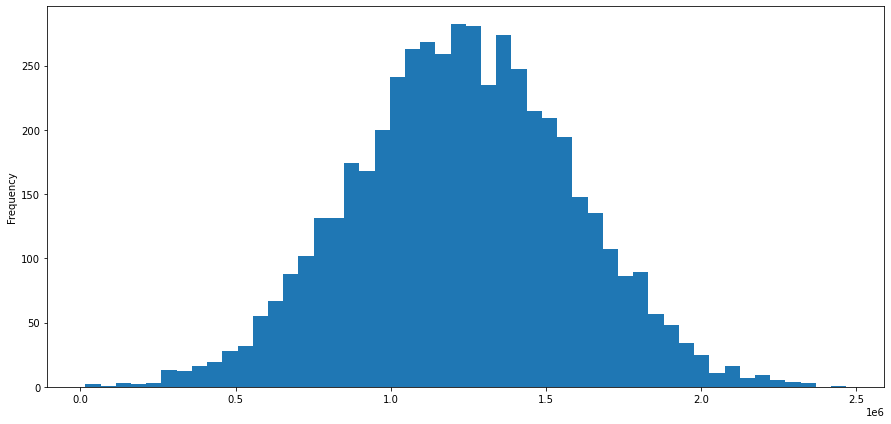

In [159]:
df['Price'].plot.hist(bins=50,figsize=(15,7))

<AxesSubplot:>

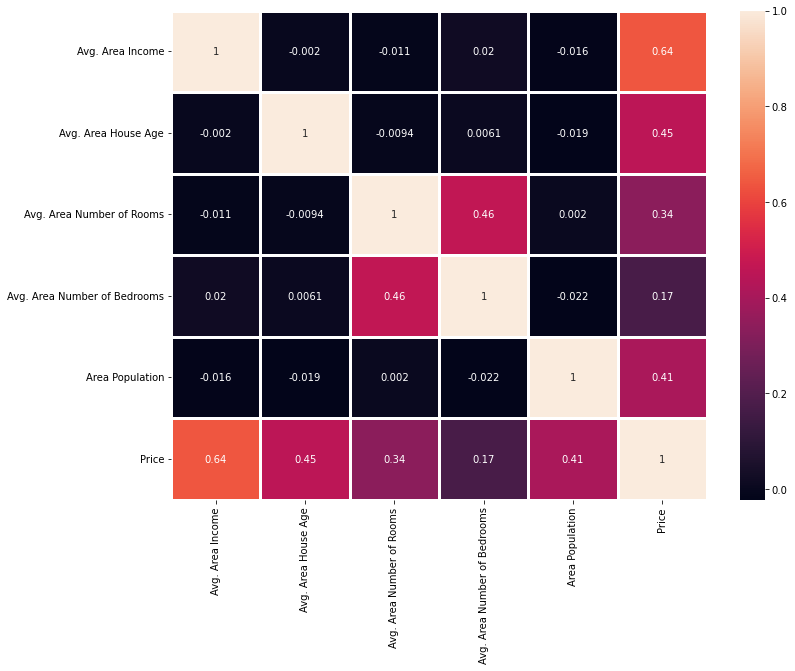

In [162]:
plt.figure(figsize=(12,))
sns.heatmap(df.corr(),annot=True,linewidths=3)

In [161]:
# Split the data into features (X) and target (y)
X = df.drop(['Price'], axis=1)
y = df['Price']

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# Initialize models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)
svr = SVR()
xgb_reg = XGBRegressor(random_state=42)

In [118]:
# Train and evaluate models using cross-validation
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
svr.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [119]:
# Predictions
linear_pred = linear_reg.predict(X_test)
decision_tree_pred = decision_tree_reg.predict(X_test)
random_forest_pred = random_forest_reg.predict(X_test)
svr_pred = svr.predict(X_test)
xgb_pred = xgb_reg.predict(X_test)

In [120]:
# Calculate RMSE for each model
rmse_linear = np.sqrt(mean_squared_error(y_test, linear_pred))
rmse_decision_tree = np.sqrt(mean_squared_error(y_test, decision_tree_pred))
rmse_random_forest = np.sqrt(mean_squared_error(y_test, random_forest_pred))
rmse_svr = np.sqrt(mean_squared_error(y_test, svr_pred))
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))

In [121]:
# Compare RMSE of different models
rmse_scores = {
    'Linear Regression': rmse_linear,
    'Decision Tree Regression': rmse_decision_tree,
    'Random Forest Regression': rmse_random_forest,
    'SVR': rmse_svr,
    'XGBoost Regression': rmse_xgb
}

In [122]:
print("Root Mean Squared Error (RMSE) for different models:")
for model, rmse in rmse_scores.items():
    print(f"{model}: {rmse}")

Root Mean Squared Error (RMSE) for different models:
Linear Regression: 100444.0605555831
Decision Tree Regression: 177673.89260083486
Random Forest Regression: 120271.07856297775
SVR: 351026.3549887652
XGBoost Regression: 119289.68427054098


In [123]:
best_model = min(rmse_scores, key=rmse_scores.get)
print(f"\nBest Model: {best_model} with RMSE: {rmse_scores[best_model]}")


Best Model: Linear Regression with RMSE: 100444.0605555831


In [124]:
predictions = linear_reg.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1000,)


In [125]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test, predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test, predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean absolute error (MAE): 80879.09723489163
Mean square error (MSE): 10089009300.893644
Root mean square error (RMSE): 100444.0605555831


In [126]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.918


## Best Model is Linear Regression model with minimum RMSE and R-squared value of predictions as 0.918